Выборка значений с.в. X
[  8.28633873  19.23643783   1.39192081   0.7296823   16.96124299
   1.99403443  14.88714071  17.36400678   3.83378176   0.50096676
  -5.89100195  -0.38095384  -2.84951406   2.69682505   0.46206001
   9.80725639   1.00278656   3.91791673  -2.6109049    1.59833095
   3.1088928   -3.2116519   17.70353895   2.32604053  -2.48949346
  12.68107116   4.99935479   1.1204014   13.40385998  18.41697284
   5.94417891  -1.02832085  -5.82874576  -1.18381388  12.29578732
  14.95797216  -1.82069185   6.94851685   7.04100188  -4.38698087
   2.03992244   5.48069838  -3.28437912   0.95789346  14.48033033
  -3.75828109  -0.25947737   2.0065857   23.28715513 -10.14503022
  11.60269189  10.92635385   7.96418955  -8.67913304   5.93709471
  -2.19669473  21.50132907   0.62376194   6.83351053  13.63905859
   0.70506203   8.48168698   5.00710151   5.86646808  -3.05884374
   0.5834004   13.52375281   3.98953128  -5.5130998    9.84820289
   4.55165445   2.29161685   9.25141093   8.59000282

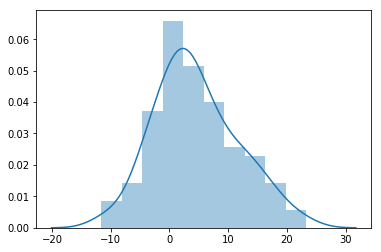

In [26]:
import numpy as np
import scipy.stats
import seaborn as sb
%matplotlib inline

# Для примера сгенерируем тестовые данные
# используем нормальное распределение

X = scipy.stats.norm.rvs(loc=4, scale=7, size=100)
Y = scipy.stats.norm.rvs(loc=4, scale=7, size=100)

# настройка вывода вещественых чисел (не использовать запись вида 1.4e01)
np.set_printoptions(suppress=True)

print("Выборка значений с.в. X")
print( X )

sb.distplot(X)

In [ ]:
# Сохранение данных в файл

# модуль с функциями для хранения и сохранения\загрузки данных
import pandas

# создать
data = pandas.DatFrame('X': X, 'Y':Y)


Для того чтобы компактно представить выборку, пусть и с небольшой потерей точности, построим интервальный вариационный ряд.


## Построение вариационного ряда, получение относительных частот 


Для построения интервального вариационного ряда определи ширину интервалов. Для этого определим число интервалов по эмпирической формуле:
$$ n = [ log_2(N) ] $$
где N - объём выборки,

[ ] - обозночают целую часть числа

Тогда ширина интервала:

$$ h = \frac{max(X) - min(X)}{n-1} $$


Левую границу первого интервала отодвиним влево на $0.5 h$, чтобы минимальное значение выборки не лежало на границе первого интервала.

In [21]:
import numpy as np

meanX = np.mean(X)
sdX = np.std( X , ddof=1)
medX = np.median(X)
modeX = scipy.stats.mode(X)

print( "Среднее: {:.2f}".format(meanX))
print( "sd     : {:.2f}".format(sdX))
print( "Медиана : {:.2f}".format(medX))
print( "Мода : {:.2f}".format(medX))


Среднее: 3.68
sd     : 7.98
Медиана : 3.59
Мода : 3.59


In [8]:
from math import *

# объём выборки (число значений в массиве X)
N = X.size

# число и ширина интервалов
n = 1 + int( log2( N ))
h = (max(X)-min(X)) / (n-1)

print(f"Ширина интервала {h:.2f}")

# Определим новые границы интервалов.
min_x = min(X)
max_x = max(X)

print(f"min X: {min_x:.2f}")
print(f"max X: {max_x:.2f}")

intervals = []
left = min_x - h/2
for i in range(1, n+1):
    intervals += [ (left + h*(i-1), 
                    left + h*i) ]

    
# преобразуем intervals в двумерный массив
intervals = np.array(intervals)
print("Интервалы")
print(intervals)

Ширина интервала 6.89
min X: -15.66
max X: 25.66
Интервалы
[[-19.10263023 -12.2161193 ]
 [-12.2161193   -5.32960837]
 [ -5.32960837   1.55690256]
 [  1.55690256   8.44341349]
 [  8.44341349  15.32992442]
 [ 15.32992442  22.21643535]
 [ 22.21643535  29.10294628]]


In [10]:
# Проверка гипотезу о нормальности распределения

scipy.stats.normaltest(X)

NormaltestResult(statistic=0.5399268634113434, pvalue=0.7634074103333033)

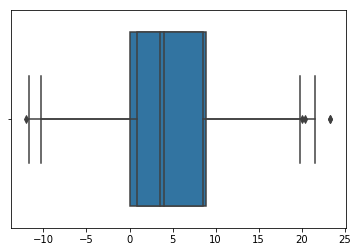

In [27]:
sb.boxplot(X)
sb.boxplot(Y)

In [29]:
# Проверка гипотезы о равенстве средних

scipy.stats.ttest_rel(X,Y)

Ttest_relResult(statistic=-0.1013392404351086, pvalue=0.9194861277547928)

In [33]:
# Проверка гипотезы о равенстве выборочного срднего математическому ожиданию генеральной совокупности

scipy.stats.ttest_1samp(X, meanX)

Ttest_1sampResult(statistic=1.187405734657519, pvalue=0.23790882883295444)

In [36]:
# вычисление коэффициента корреляции Пирсона (линейного к.к.)

r, p = scipy.stats.pearsonr(X, Y)

print("r = {:.2f}",r)
print("p-value = {:.2f}",p)

r = {:.2f} -0.12414185220861158
p-value = {:.2f} 0.21848097833199637


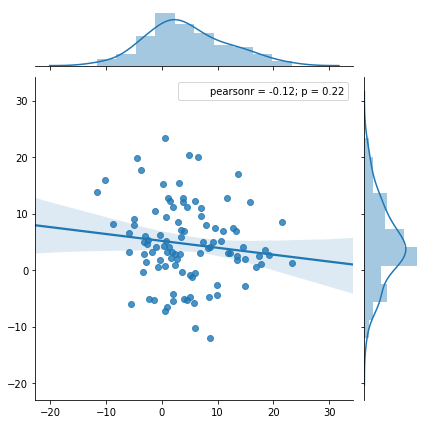

In [38]:
sb.jointplot(X,Y, kind='reg')